### Libraries


In [10]:
!pip install mtcnn

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import numpy as np
from numpy import expand_dims
from numpy import asarray
import pandas as pd
import cv2 as cv
import random
import PIL
from PIL import Image
from os import listdir
from matplotlib import image
from matplotlib import pyplot as plt
import seaborn as sns
import mtcnn
from mtcnn.mtcnn import MTCNN
import keras
from keras.models import load_model
import tensorflow
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Live photo

In [14]:
Identity = "Guglielmo"
print(Identity)

Guglielmo


<IPython.core.display.Javascript object>

Saved to photo.jpg


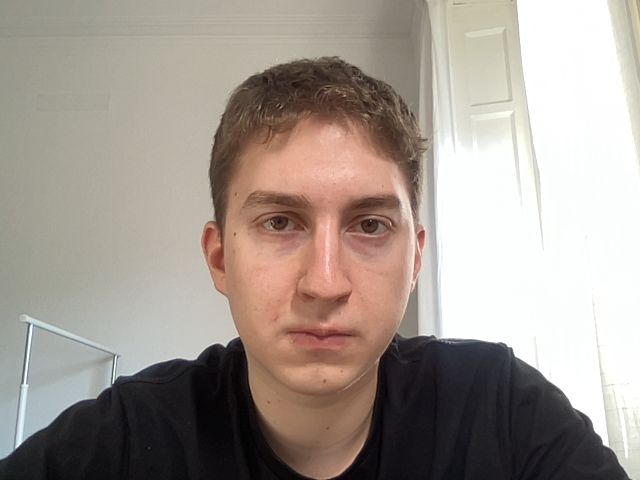

In [15]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Face detection

In [16]:
detector = MTCNN() # Multi-Task Cascaded Convolutional Neural Network

In [17]:
img = cv.imread('/content/photo.jpg')
face = detector.detect_faces(img)

x1, y1, width, height = face[0]['box']
x2, y2 = x1 + width, y1 + height

if width < 50 or height < 50:
    print('Errore')

# face extraction
crop = img[y1:y2, x1:x2]
cv.imwrite('face.jpg', crop)

True

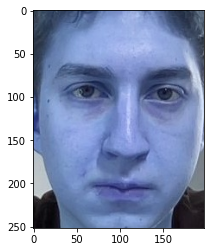

In [18]:
face = cv.imread('/content/face.jpg')
plt.imshow(face)

# Model

In [19]:
model     = load_model("/content/drive/MyDrive/Progetto DIGITAL/02_Classification - 2D/Modelli/NN_BinaryClassifier_2D.h5")
model_aug =  load_model("/content/drive/MyDrive/Progetto DIGITAL/02_Classification - 2D/Modelli/NN_BinaryClassifier_Augmentation_2D.h5")

In [20]:
def face_recognition(model, face):# The VGGFace algorithm requires the faces to be resized to 224 x 224 pixels
  volti = ['Anna', 'Beatrice', 'Guglielmo']
  face = cv.resize(face,(224,224))
  # Expanding 1 dim
  face = np.expand_dims(face, axis=0)
  # Converting the data type
  face = face.astype('float32')/255.0
  prediction = model.predict(face)
  idx=[]
  for i in prediction:
    idx_max=np.argmax(i[0])
    idx.append(idx_max)
  if sum(idx)>1:
    print('Identity: '+ Identity)
    print("Non è stato possibile determinare l'identità della persona in foto")
  elif sum(idx)==0:
    print('Identity: '+ Identity)
    print("Il volto appartiene ad una persona sconosciuta")
  else:
    who = volti[idx.index(1)]
    print('Identity: '+ Identity)
    print("È stato riconosciuto il volto di "+ str(who))

In [21]:
face_recognition(model_aug, face)

Identity: Guglielmo
È stato riconosciuto il volto di Guglielmo
